In [2]:
import numpy as np
import warnings
import matplotlib.pylab as pyp
import math
from PIL import Image

Original image: (850, 850) uint8 0 255
Perona-Malik Anisotropic Diffusion: (850, 850) float64 0.0 1.0


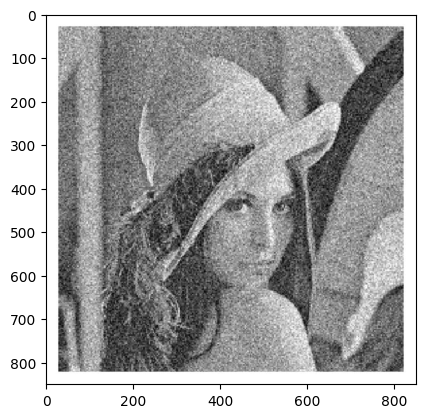

In [3]:

resultImage = np.array(Image.open('assets/noisy-lena.png').convert('L'))  ## Specify the original file path

im_min, im_max = resultImage.min(), resultImage.max()

print("Original image:", resultImage.shape, resultImage.dtype, im_min, im_max)
resultImage = (resultImage - im_min) / (float)(im_max - im_min)   ## Conversion
print("Perona-Malik Anisotropic Diffusion:", resultImage.shape, resultImage.dtype, resultImage.min(), resultImage.max())

pyp.figure('Image BEFORE Perona-Malik anisotropic diffusion')
pyp.imshow(resultImage, cmap='gray')
pyp.axis('on')


pyp.show() 

In [4]:
def f(lam,b):
    return np.exp(-1* (np.power(lam,2))/(np.power(b,2)))

def anisodiff(im, steps, b, lam = 0.25):  #takes image input, the number of iterations, 
    

    im_new = np.zeros(im.shape, dtype=im.dtype) 
    for t in range(steps): 
        dn = im[:-2,1:-1] - im[1:-1,1:-1] 
        ds = im[2:,1:-1] - im[1:-1,1:-1] 
        de = im[1:-1,2:] - im[1:-1,1:-1] 
        dw = im[1:-1,:-2] - im[1:-1,1:-1] 
        im_new[1:-1,1:-1] = im[1:-1,1:-1] +\
                            lam * (f(dn,b)*dn + f (ds,b)*ds + 
                                    f (de,b)*de + f (dw,b)*dw) 
        im = im_new 
    return im
  

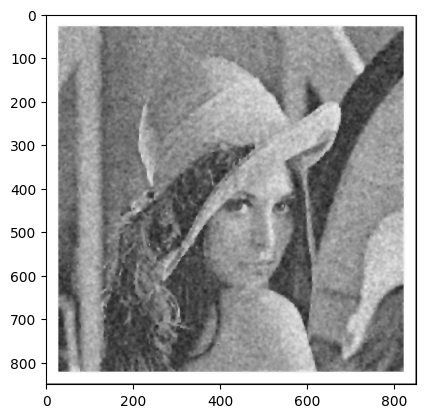

In [6]:

im2 = anisodiff(resultImage, 20, 0.15, 0.15)
pyp.figure('Image AFTER Perona-Malik anisotropic diffusion')
pyp.imshow(im2, cmap='gray')
pyp.axis('on')
pyp.show()